## Dataset : MNIST Number Dataset 

In [3]:
import numpy as np
import keras as K
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='2'  # suppress CPU msg

Using TensorFlow backend.


#### Preprocessing :

In [4]:
def display(raw_data_x, raw_data_y, idx):
  label = raw_data_y[idx]  # like '5'
  print("digit = ", str(label), "\n")
  pixels = np.array(raw_data_x[idx])  # target row of pixels
  pixels = pixels.reshape((28,28))
  plt.rcParams['toolbar'] = 'None' 
  plt.imshow(pixels, cmap=plt.get_cmap('gray_r'))
  plt.show() 

In [5]:
class MyLogger(K.callbacks.Callback):
  def __init__(self, n):
    self.n = n   # print loss every n epochs

  def on_epoch_end(self, epoch, logs={}):
    if epoch % self.n == 0:
      curr_loss =logs.get('loss')
      print("epoch = %4d loss = %0.6f" % (epoch, curr_loss))

In [6]:
def main():
  # 0. get started
  print("Begin MNIST anomaly detect using an autoencoder ")
  np.random.seed(1)  # not used

  # 1. load data into memory
  # 2. define autoencoder model
  # 3. compile model
  # 4. train model
  # 5. save model
  # 6. use model to find anomaly

if __name__=="__main__":
  main()

Begin MNIST anomaly detect using an autoencoder 


#### Load the Dataset (1000 images from MNIST dataset)

In [7]:
# 1. load data
print("Loading Keras version MNIST data into memory \n")
data_file = "mnist_keras_1000.txt"
data_x = np.loadtxt(data_file, delimiter=" ",
  usecols=range(2,786), dtype=np.float32)
labels = np.loadtxt(data_file, delimiter=" ",
  usecols=[0], dtype=np.float32)
norm_x = data_x / 255

Loading Keras version MNIST data into memory 



#### Defining the Autoencoder model (784-100-50-100-784 with tanh)

In [8]:
# 2. define autoencoder model
print("Creating a 784-100-50-100-784 autoencoder ")
my_init = K.initializers.glorot_uniform(seed=1)
autoenc = K.models.Sequential()
autoenc.add(K.layers.Dense(input_dim=784, units=100, 
  activation='tanh', kernel_initializer=my_init))
autoenc.add(K.layers.Dense(units=50, 
  activation='tanh', kernel_initializer=my_init))
autoenc.add(K.layers.Dense(units=100, 
  activation='tanh', kernel_initializer=my_init)) 
autoenc.add(K.layers.Dense(units=784,
  activation='tanh', kernel_initializer=my_init)) 

# 3. compile model
simple_adam = K.optimizers.adam()  
autoenc.compile(loss='mean_squared_error',
  optimizer=simple_adam)

Creating a 784-100-50-100-784 autoencoder 


#### Training the model with 400 epoches

In [9]:
# 4. train model
print("Starting training")
max_epochs = 400
my_logger = MyLogger(n=100)
h = autoenc.fit(norm_x, norm_x, batch_size=40, 
  epochs=max_epochs, verbose=0, callbacks=[my_logger])
print("Training complete")

Starting training
epoch =    0 loss = 0.076969
epoch =  100 loss = 0.012946
epoch =  200 loss = 0.011671
epoch =  300 loss = 0.010599
Training complete


#### Finding the Anomaly :

In [10]:
# 6. find most anomalous data item
N = len(norm_x)
max_se = 0.0; max_ix = 0
predicteds = autoenc.predict(norm_x)
for i in range(N):
  diff = norm_x[i] - predicteds[i]
  curr_se = np.sum(diff * diff)
  if curr_se > max_se:
    max_se = curr_se; max_ix = i

#### Display:

Most anomalous digit is at index  149
digit =  2 



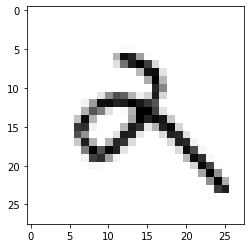

In [11]:
raw_data_x = data_x.astype(np.int)
raw_data_y = labels.astype(np.int)
print("Most anomalous digit is at index ", max_ix)
display(raw_data_x, raw_data_y, max_ix)